# CUSTOMER CHURN PREDICTION MODEL

# Importing the Data

In [1]:
# use these links to do so:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import os
os.getcwd()
data=pd.read_csv("Churn.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Understanding the data

In [2]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data=data.drop('customerID',axis=1)   # dropping non relevant column or no use column

In [4]:
data[data.iloc[:,:]==' '] = np.NaN

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [5]:
data['TotalCharges'] = data['TotalCharges'].astype(float)  #TotalCharges and MonthlyCharges are numbers but in object format so we are converting it into float type i.e numeric type
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
data=data.fillna(data.mean())    #fill the null values with the mean

In [7]:
data.isnull().sum()      #counting the sum of null values for each column 


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# surprisingly there is no null values in the given dataset

### Data Manipulation

In [9]:
data_col=data.columns   # checking the names of different columns or description of columns
data_col

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
le = preprocessing.LabelEncoder()   #converting categorical data into numerical data
for i in data_col:
    data[i]=le.fit_transform(data[i])

In [11]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1


In [12]:
y=data.iloc[:,-1]
X=data.iloc[:,0:-1]


### Data Visualization

In [13]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [14]:
from pylab import rcParams
%matplotlib inline

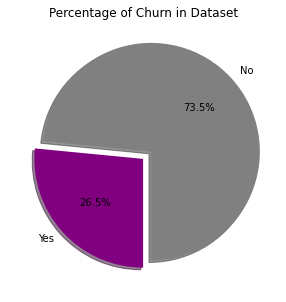

In [15]:
# Data to plot
sizes = data['Churn'].value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
# Plot
labels  = 'No', 'Yes'
explodeTuple = (0.1, 0.0)
plt.pie(sizes, explode=explodeTuple, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

In [16]:
### Conclusion: we can see that 26.5% Of the total amount of customer churn.

### Implement Machine Learning Models

In [17]:
#APPLYING MODELS ON UNBALENCED CLASS DATA
#LOGISTIC
f1 = []
acc = []
n = 150
print("Logistic:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    lr = LogisticRegression(random_state=0, solver='liblinear')
    lr.fit(X_train, y_train)
    ypred=lr.predict(X_test)
    f1.append(f1_score(y_test, ypred, average='weighted'))
    acc.append(accuracy_score(y_test, ypred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Logistic:
Avg F1-Score 0.7931296301462308
Max F1-Score 0.8154550108366019
Min F1-Score 0.7703997177004199
Avg Accuracy 0.8012147026344849
Max Accuracy 0.8230004732607666
Min Accuracy 0.7813535257927118


In [18]:
#RANDOM FOREST
n = 50
print("Random Forest:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0) 
    rf.fit(X_train, y_train)
    ypred=rf.predict(X_test)
    f1.append(f1_score(y_test, ypred, average='weighted'))
    acc.append(accuracy_score(y_test, ypred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Random Forest:
Avg F1-Score 0.7906065635625338
Max F1-Score 0.8154550108366019
Min F1-Score 0.7563537873908538
Avg Accuracy 0.7990976841795543
Max Accuracy 0.8230004732607666
Min Accuracy 0.7679205110007097


In [19]:
#  OUR DATA IS UNBALENCE HENCE BALENCING THE DATA USING SMOTE

a = np.array(data.iloc[:, data.columns != 'Churn'])
b = np.array(data.iloc[:, data.columns == 'Churn'])
print('Shape of X: {}'.format(a.shape))
print('Shape of y: {}'.format(b.shape))

Shape of X: (7043, 19)
Shape of y: (7043, 1)


In [20]:
!pip install imbalanced-learn --user
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4930, 19)
Number transactions y_train dataset:  (4930,)
Number transactions X_test dataset:  (2113, 19)
Number transactions y_test dataset:  (2113,)


In [21]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\dell\anaconda3\lib\site-packages (0.24.1)


In [22]:
conda update scikit-learn

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... 

Updating scikit-learn is constricted by 

anaconda -> requires scikit-learn==0.23.1=py38h25d0782_0

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

# All requested packages already installed.




In [23]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1316
Before OverSampling, counts of label '0': 3614 

After OverSampling, the shape of train_X: (7228, 19)
After OverSampling, the shape of train_y: (7228,) 

After OverSampling, counts of label '1': 3614
After OverSampling, counts of label '0': 3614


In [24]:
#NAIVE BAYES
n = 50
print("Naive Bayes:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    nb = GaussianNB()
    nb.fit(X_train_res, y_train_res)
    y2pred = nb.predict(X_test)
    f1.append(f1_score(y_test, y2pred, average='weighted'))
    acc.append(accuracy_score(y_test, y2pred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Naive Bayes:
Avg F1-Score 0.7806993064061644
Max F1-Score 0.8154550108366019
Min F1-Score 0.7183840341615069
Avg Accuracy 0.7847316604735228
Max Accuracy 0.8230004732607666
Min Accuracy 0.7004968062455642


In [25]:
#MULTI LAYER PERCEPTRON
n = 50
print("MLP:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = MLPClassifier(solver='sgd', alpha=0.00001, hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000)
    clf.fit(X_train_res, y_train_res)
    y3pred = clf.predict(X_test)
    f1.append(f1_score(y_test, y3pred, average='weighted'))
    acc.append(accuracy_score(y_test, y3pred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

MLP:
Avg F1-Score 0.7543835894814375
Max F1-Score 0.8154550108366019
Min F1-Score 0.5901604681228262
Avg Accuracy 0.7764460075746353
Max Accuracy 0.8230004732607666
Min Accuracy 0.7004968062455642


In [26]:
#LOGISTIC
n = 150
print("Logistic:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    lr = LogisticRegression(random_state=0, solver='liblinear')
    lr.fit(X_train_res, y_train_res)
    y5pred=lr.predict(X_test)
    f1.append(f1_score(y_test, y5pred, average='weighted'))
    acc.append(accuracy_score(y_test, y5pred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Logistic:
Avg F1-Score 0.7587025812286436
Max F1-Score 0.8154550108366019
Min F1-Score 0.5901604681228262
Avg Accuracy 0.7701699786523231
Max Accuracy 0.8230004732607666
Min Accuracy 0.7004968062455642


In [31]:
# NOW APPLYING MODEL TO BALENCED CLASS DATA.
f1 = []
acc = []
n = 50
print("Random Forest:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0) 
    rf.fit(X_train_res, y_train_res)
    ypred=rf.predict(X_test)
    f1.append(f1_score(y_test, ypred, average='weighted'))
    acc.append(accuracy_score(y_test, ypred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Random Forest:
Avg F1-Score 0.9312513394181523
Max F1-Score 0.950319375443577
Min F1-Score 0.9200218308463333
Avg Accuracy 0.9310858765081618
Max Accuracy 0.950319375443577
Min Accuracy 0.9198012775017743


### Model Evaluation

accuracy:   93.187
[[978  57]
 [ 39 335]]


Text(17.5, 0.5, 'true values')

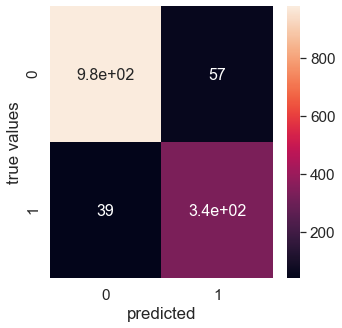

In [32]:
#RANDOM FOREST
score = metrics.accuracy_score(y_test, ypred)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, ypred, labels=[0,1])
print(cm)
sns.set(font_scale=1.4)
sns.heatmap(cm,annot=True,annot_kws={'size':16})
#sns.set_axis_labels('true values','predicted')
plt.xlabel("predicted")
plt.ylabel("true values")

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,ypred)
print('AUC: %.3f' % auc)

AUC: 0.920


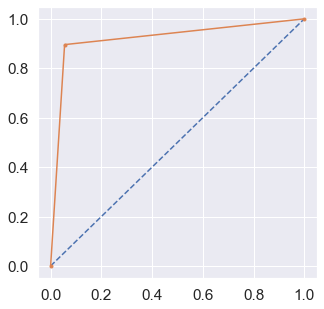

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, ypred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Final Conclusions

In [35]:
# I HAVE USED 4 CLASSIFIERS FOR CLASSIFICATION
# RANDOM FOREST,LOGISTIC,MLP,NAIVE BAYES
# OUR DATA CONSIST OF UN BALENCE CLASS
#82%ACCURACY SCORE WITHOUT BALENCING THE DATA USING RANDOM FOREST 
#AFTER BALENCING THE CLASS USING SMOTE WE GOT MUCH BETTER RESULTS
#RANDOM FOREST OUT PERFORMS ALL THE MODELS WITH 93% ACCURACY & 0.92 AUC SCORE.
#ACCURACY CAN BE FURTHER INCREASED USING PARAMETER TUNING.

In [36]:
# What are the key factors that predict customer churn? Do these factors make sense?

# Answer:
# we can select factors that predict customer churn on the basis of Events After Onboarding,Overall Usage level,Lowering Subscription Plan,Customer Service,Feedback of Customer


In [37]:
# What offers should be made to which customers to encourage them to remain with company?

# Answer:
# In order to win the fight against churn and to define reducing actions, it is essential to understand where the problem is coming from.
# A logic next step could be building an predictive intelligent algorithm where you take all the variables into consideration (yes you can also call it Machine Learning).

In [38]:
# Assuming these actions were implemented, how would you determine whether they had worked?

# Answer
# After running the algorithms on the test set, we have a display on what is the model’s performance.
# Being able to identify potential churners in advance allows the company to develop strategies to prevent customers from leaving the client base. With this data in hand, companies can offer incentives, like discounts or loyalty programs, or provide additional services in an attempt to reduce the churn rate.